In [1]:
# installing dependencies
!pip install eli5
!pip install scikit-learn matplotlib
!pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=b6bfed20003fc678d69317fc2c5e77240d4d08771c0b44df33a3724f72503dab
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
#Reading the dataset
data=pd.read_csv('Housing.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Viewing data in the file
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Q1 What are the data types? (Only numeric and categorical)**

In [5]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

A. The dataset contains 7 Categorical and 6 Numerical features

Transform categorical data using Ordinal Encoding

In [3]:
numeric_cols=[]
cat_cols=[]
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [30]:
print(numeric_cols)
print(cat_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
for col in cat_cols:
    data[col]=le.fit_transform(data[col])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


**Q2 Are there any missing values?**

In [14]:
# checking if the any data is missing
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

A. There are no missing values in the dataset

**Q5 Which independent variables have missing data? How much?**

A. There is no missing data for independent variables

**Q3 What are the likely distributions of the numeric variables?**

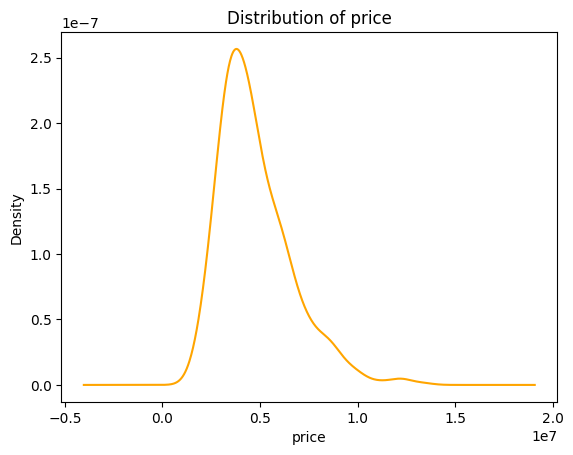

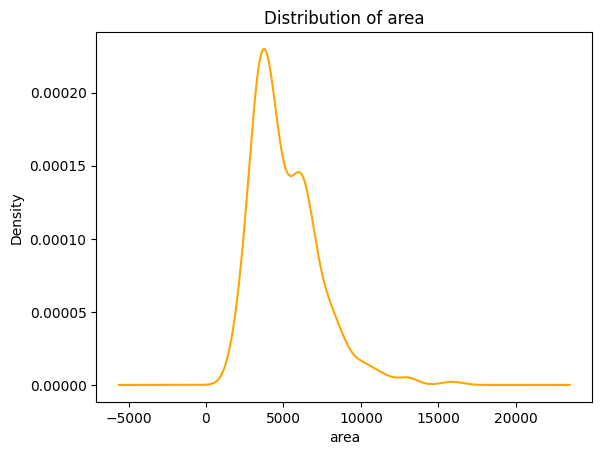

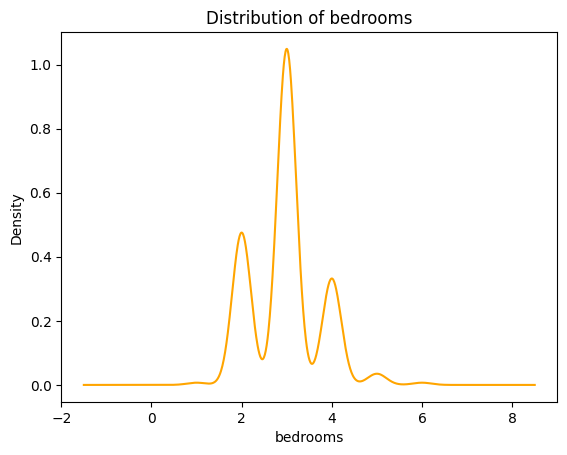

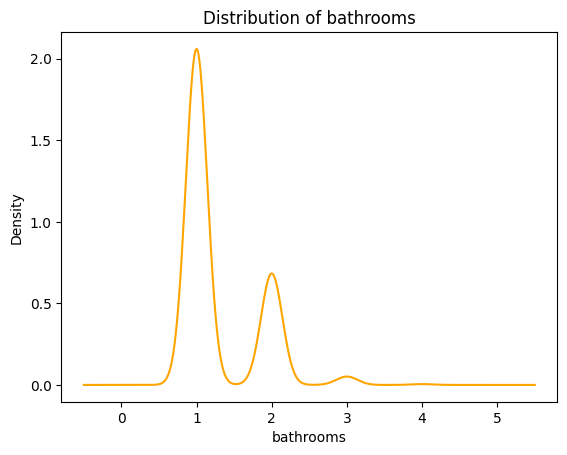

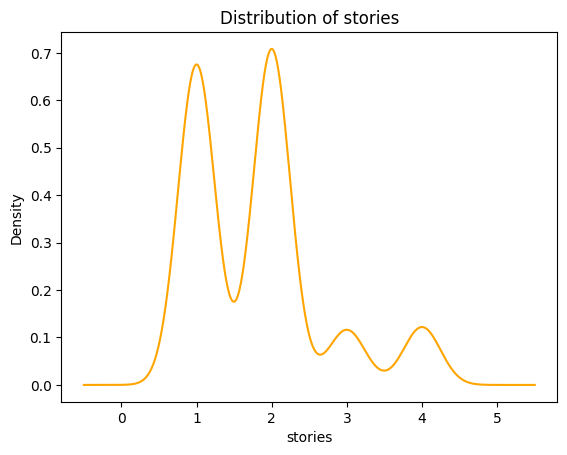

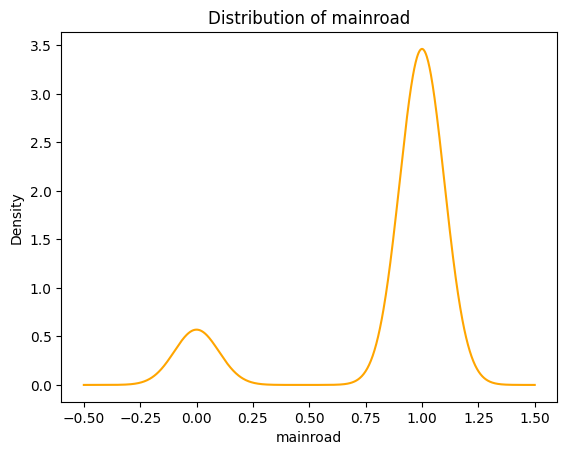

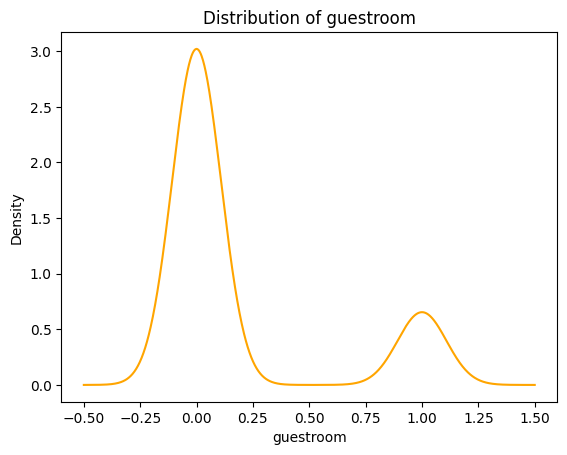

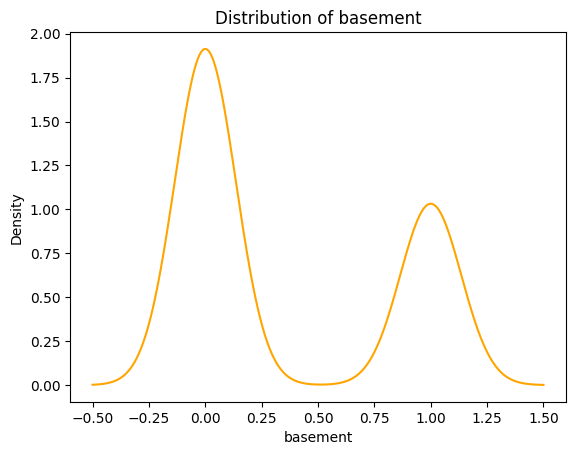

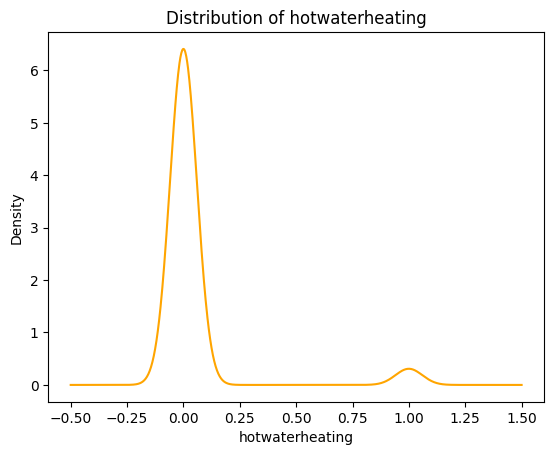

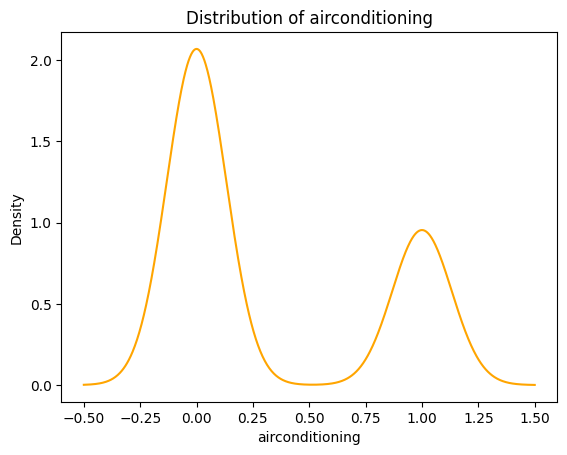

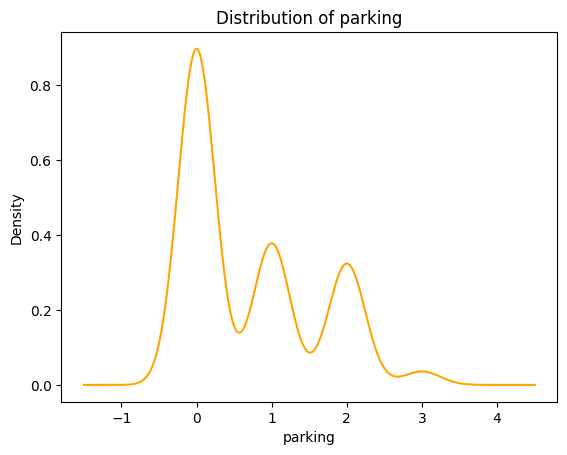

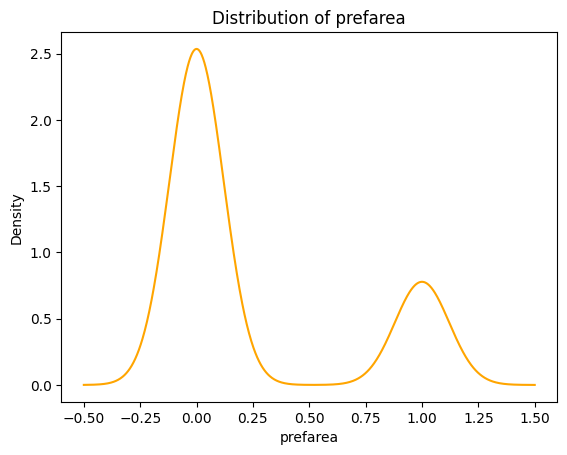

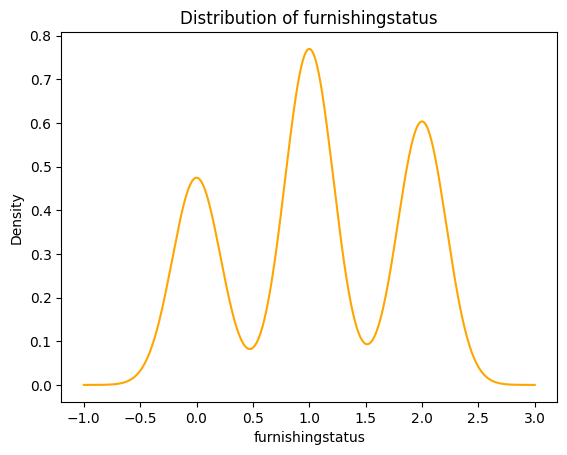

In [25]:
# Plotting the distribution of independent variables
for column in data.columns:
    # Check if the column is numeric (excluding 'object' dtype)
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column].plot.density(color="Orange")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.show()

A. From the above graph it can be seen that for Area the distribution is more likely to be Normal Distribution.

Note: The distribution graph may not provide meaningful insights for other numeric variables since they represent a limited range of discrete numeric values that don't fit well into typical distribution graphs.

**Q9. Do the ranges of the predictor variables make sense?**

In [16]:
#Range of each column
data.max() - data.min()

price               11550000
area                   14550
bedrooms                   5
bathrooms                  3
stories                    3
mainroad                   1
guestroom                  1
basement                   1
hotwaterheating            1
airconditioning            1
parking                    3
prefarea                   1
furnishingstatus           2
dtype: int64

A. The range of "price" and "area" variables is high, this implies high variablity in their distribution.

**Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

A. 1) Univariate Selction

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Separate features (independent variables) and the target (dependent variable)
X = data.iloc[:, 1:13]  # Features
y = data.iloc[:, -1]   # Target variable

# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it contains categorical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SelectKBest with the chi-squared scoring function
k_best = SelectKBest(score_func=chi2, k='all')
fit = k_best.fit(X, y_encoded)

In [18]:
# Get the scores and feature names
scores = fit.scores_
feature_names = X_encoded.columns

# Create a DataFrame to display the scores for each feature
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display the scores
print("Feature Scores:")
print(feature_scores)

Feature Scores:
             Feature         Score
0               area  14646.254209
11  furnishingstatus    294.795883
9            parking     18.797594
8    airconditioning     10.023289
5          guestroom      6.277670
6           basement      5.121420
10          prefarea      5.001351
3            stories      2.515769
7    hotwaterheating      2.490420
2          bathrooms      2.238329
4           mainroad      1.891387
1           bedrooms      1.682885


In [19]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 12)
fit = bestFeatures.fit(X,y)

In [20]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

               Specs         Score
0               area  14646.254209
11  furnishingstatus    294.795883
9            parking     18.797594
8    airconditioning     10.023289
5          guestroom      6.277670
6           basement      5.121420
10          prefarea      5.001351
3            stories      2.515769
7    hotwaterheating      2.490420
2          bathrooms      2.238329


2) Feature Importance using Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(5).index

In [22]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop("price", axis=1)  # Assuming "target_variable" is your target column
y = data["price"]

# Instantiate the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Display feature importances in descending order
print(feature_importances.sort_values(ascending=False))

area                0.464784
bathrooms           0.154948
parking             0.061491
stories             0.055532
furnishingstatus    0.055284
airconditioning     0.055122
bedrooms            0.042762
prefarea            0.034899
basement            0.030898
guestroom           0.017785
hotwaterheating     0.016831
mainroad            0.009665
dtype: float64


3) Recursive Feature Elimination(RFE)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix and y is your target variable
X = data.drop("price", axis=1)
y = data["price"]

# Instantiate the linear regression model
model = LinearRegression()

# Specify the number of features to select (adjust as needed)
n_features_to_select = 5

# Create the RFE model
rfe = RFE(model, n_features_to_select=n_features_to_select)

# Fit the RFE model to your data
fit = rfe.fit(X, y)

# Print the ranking of features (1 indicates selected)
print("Feature Ranking:")
print(fit.ranking_)

# Get the selected features
selected_features = X.columns[fit.support_]

# Display the selected features
print("\nSelected Features:")
print(selected_features)

Feature Ranking:
[8 7 1 4 1 2 5 1 1 3 1 6]

Selected Features:
Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')


**Q8. Which predictor variables are the most important?**

A. From the above feature selection process performed, we can say that "area", "", "", "", "" and "" predictor variables are the most important in this regression model.

**Q7. In the predictor variables independent of all the other predictor variables?**

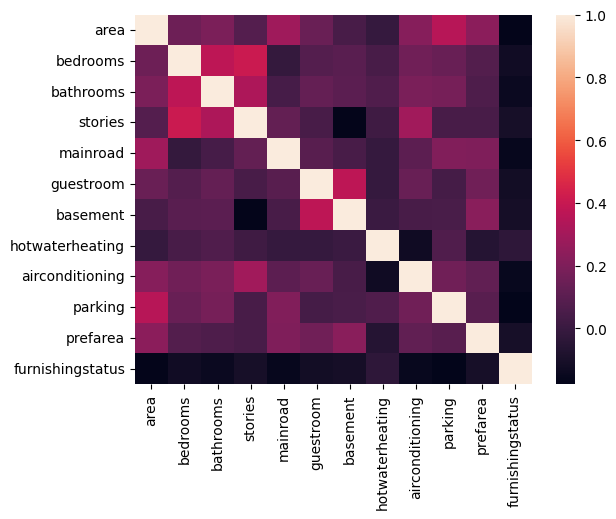

In [24]:
X = data.drop("price", axis=1)
X.corr()
sns.heatmap(X.corr());

A. According to the heatmap, we can see that there is no multicollinearity between the variables i.e most of the predictor variables are not correlated to each other.

**Q10. What are the distributions of the predictor variables?**

Splitting the data into train and test; 75% for training and 25% for testing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [36]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 4464348.76208794  3546484.32876789  4744685.20887987  5212187.68921012
  5178180.27231526  3278700.94436936  3465799.21607481  4202525.94619813
  4335933.30608589  3858219.49284619  2811207.94096006  7994916.2563859
  3825535.7643265   3408546.34834288  3081488.94742977  3407367.63243476
  4327281.0653985   4975166.02149697  5938750.44227231  5277395.70838214
  3678409.41833194  4104104.00321249  3909618.08488321  4366317.78694697
  5756287.83603096  3414756.484649    2398905.45733911  6642173.80507528
  3750112.8980931   4085111.27853054  4746225.23616893  3263719.3729062
  2617715.17773562  4317073.31374626  6490631.12840457  6206638.40576266
  4679349.94673551  2716963.06613717  2727410.2122847   3701512.30063321
  6912364.99427563  5875309.53275677  3396337.15120614 10689415.01913489
  6632728.78019611  8257083.79976098  2716963.06613717  3135131.19802891
  2965901.71384262  3093342.61343879  7116309.11261819  4237488.44517469
  4233433.14871617  5618667.63083854  6467179.3119892

**Q6. Do the training and test sets have the same data?**

In [42]:
# Shape of Training and Testing Data
print("Shape of Training data is = " + str(X_train.shape))
print("Shape of Test data is = " + str(X_test.shape))

Shape of Training data is = (381, 12)
Shape of Test data is = (164, 12)


In [43]:
train_unique_values = set(y_train.unique())
test_unique_values = set(y_test.unique())

if train_unique_values == test_unique_values:
    print("Training and test sets have the same unique values.")
else:
    print("Training and test sets have different unique values.")

Training and test sets have different unique values.


A. As we can see, the training and testing datasets are not same.

Here, we have trained the regression model without removing the outliers

In [37]:
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

mean squared error: 962307352263.5323 

r2_score :  0.7023222995804048


<Axes: >

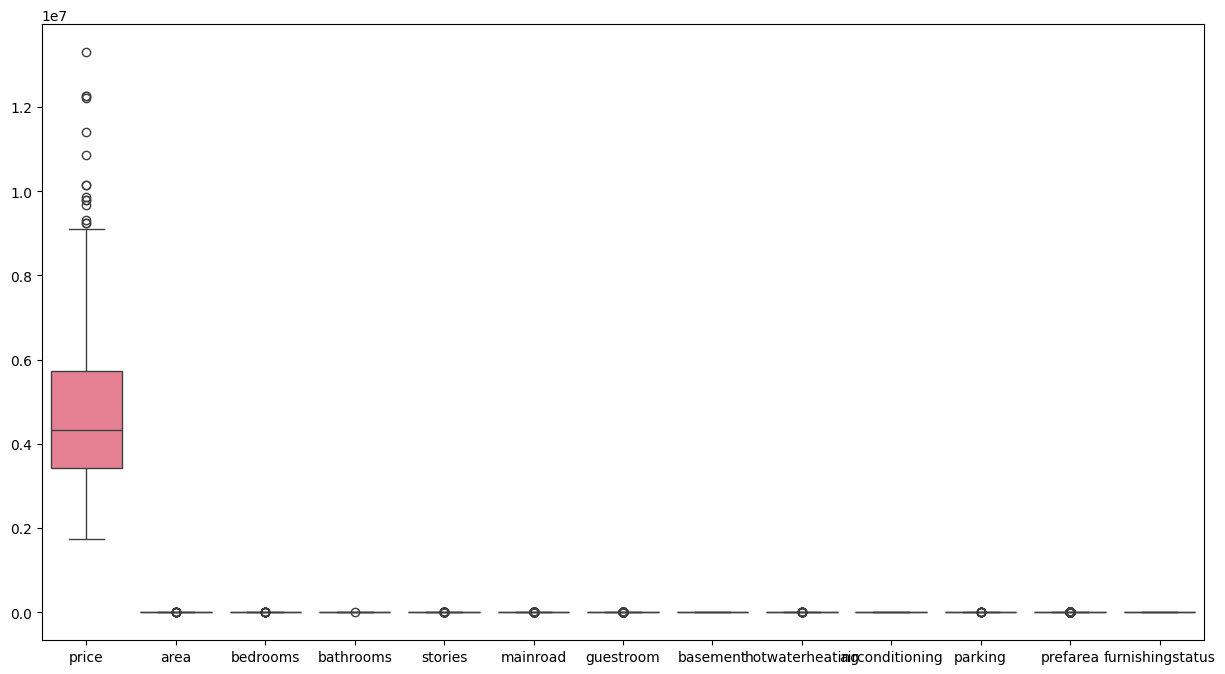

In [10]:
plt.figure(figsize=[15, 8])
sns.boxplot(data=data)

We can see that there are outliers present in multiple variables which we are going to remove in the next step

In [11]:
pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.5 MB/s eta 0:00:00


In [38]:
from datasist.structdata import detect_outliers

index = detect_outliers(
    data,
    0,
    [
         "price",
        "area",
        "bedrooms",
        "bathrooms",
        "stories",
        "mainroad",
        "guestroom",
        "basement",
        "hotwaterheating",
        "airconditioning",
        "parking",
        "prefarea",
        "furnishingstatus",
    ],
)
len(index)

308

In [39]:
for col in data[
    [
        "price",
        "area",
        "bedrooms",
        "bathrooms",
        "stories",
        "mainroad",
        "guestroom",
        "basement",
        "hotwaterheating",
        "airconditioning",
        "parking",
        "prefarea",
        "furnishingstatus",
    ]
]:
    outliers_indices = detect_outliers(data, 0, [col])
    col_median = data[col].median()
    data[col].iloc[outliers_indices] = col_median

Now we can see that outliers have been reduced from the dataset

In [40]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[4546983.34497444 6677508.07392132 3220714.6232854  4538054.43870065
 5441644.33429375 4828438.91229226 5306432.21038788 4925822.37994944
 5982928.35871616 6103909.13219782 3341545.17006756 3899608.9155737
 5361222.71130648 5439922.73338909 3830944.50666337 5214884.28472329
 5105216.77142297 7209859.61751893 3610230.86436618 3956150.15663194
 3801436.03542714 4087714.01722455 5395814.51764583 4408404.21772733
 3929533.15931897 4345923.43466405 3802374.55618998 4215063.45278158
 5618405.08838839 5368566.4224747  6510382.12057712 2787428.7809671
 4381020.277272   5559681.91000334 4173041.58262292 4248373.98213263
 4675953.96074308 5178986.07131641 4472937.79278818 3501199.90419099
 3681514.07916979 3059784.5938683  4687914.45960367 4703680.73187225
 6000673.2835279  2740739.19755341 3918643.17616167 5125642.38447395
 3147661.10859808 4729036.43648212 4017455.18077134 5176594.1539958
 4497814.17647434 3187722.65098149 5262167.0358072  7484914.68740842
 4772437.56614929 3080553.61152023 56

Here we can see that removing outliers has affected in prediction accuracy of the model

In [41]:
print("mean squared error:" , mean_squared_error(y_test,y_pred), "\n")
print("r2_score : ", r2_score(y_test, y_pred))

mean squared error: 1058911906817.0728 

r2_score :  0.5307267852341796


**Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

A. It is observed that the error rate in prediction of prices has increased when outliers are removed thus decreasing the accuracy.

**Q6. What are the distributions of the predictor variables?**

<ipython-input-75-109621cc0ed1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=False, bins=30, ax=axes[i])  # Set kde=False if you don't want the kernel density estimate


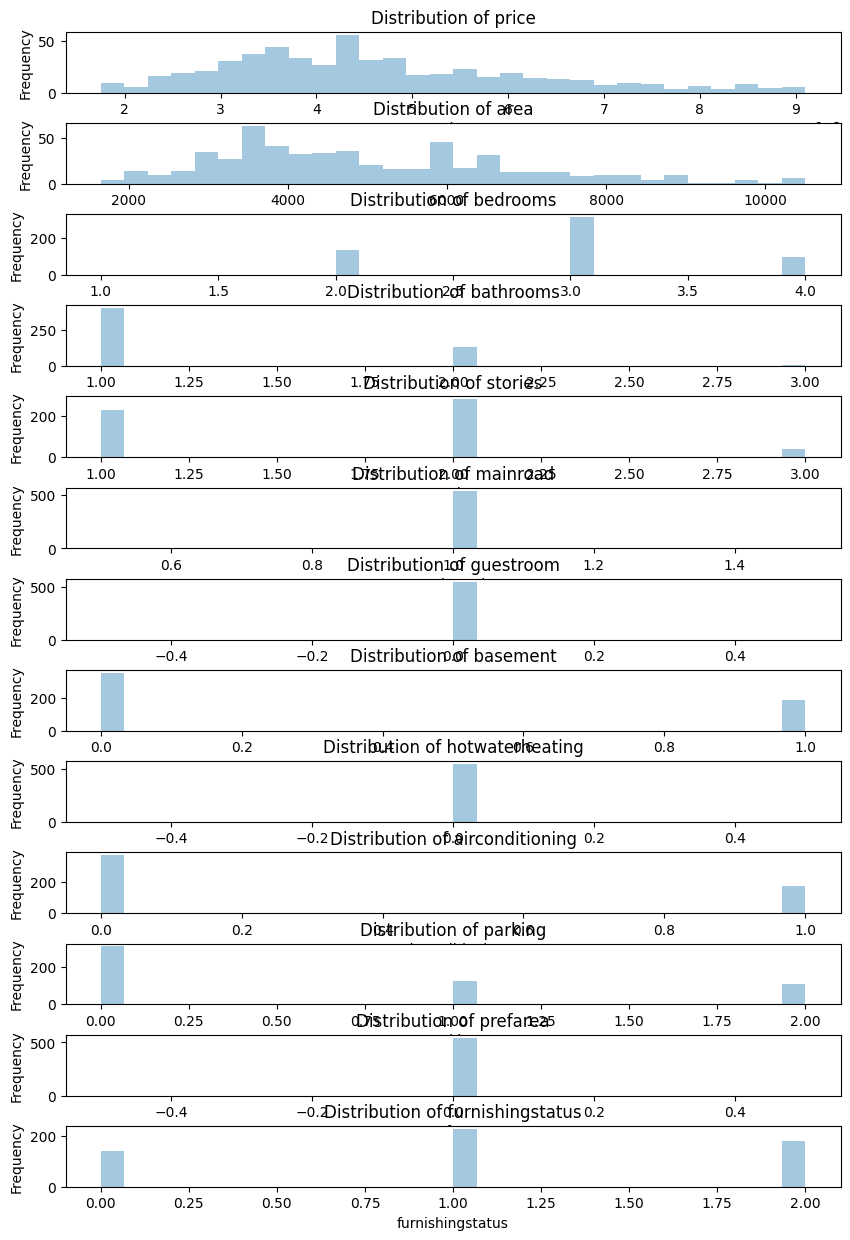

In [75]:
numeric_columns = data.select_dtypes(include='number').columns  # Selecting numeric columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)

# Iterate through numeric columns and create distplot
for i, column in enumerate(numeric_columns):
    sns.distplot(data[column], kde=False, bins=30, ax=axes[i])  # Set kde=False if you don't want the kernel density estimate
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.show()

 **Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [44]:
df_imputation= data[['price']]
df_imputation['1_percent'] = df_imputation[['price']]
df_imputation['5_percent'] = df_imputation[['price']]
df_imputation['10_percent'] = df_imputation[['price']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
df_imputation.head()

<ipython-input-44-f7ae06fe6ec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['price']]
<ipython-input-44-f7ae06fe6ec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['price']]
<ipython-input-44-f7ae06fe6ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,price,1_percent,5_percent,10_percent
0,4340000,4340000,4340000,4340000
1,4340000,4340000,4340000,4340000
2,4340000,4340000,4340000,4340000
3,4340000,4340000,4340000,4340000
4,4340000,4340000,4340000,4340000


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price'}, axis=1)
              .sort_values('price', ascending=True))
  xs = counted['price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['1_percent']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '1_percent'}, axis=1)
              .sort_values('1_percent', ascending=True))
  xs = counted['1_percent']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('1_percent', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('1_percent')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['5_percent']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '5_percent'}, axis=1)
              .sort_values('5_percent', ascending=True))
  xs = counted['5_percent']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('5_percent', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('5_percent')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['10_percent']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '10_percent'}, axis=1)
              .sort_values('10_percent', ascending=True))
  xs = counted['10_percent']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('10_percent', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('10_percent')
_ = plt.ylabel('count()')

In [45]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [46]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price            price              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [47]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [48]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

In [49]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price            price         0.000000
1_percent    1_percent         0.917431
5_percent    5_percent         4.954128
10_percent  10_percent         9.908257


In [50]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [51]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Length of number_1_idx is 5 and it contains 0.9174311926605505% of total data in column | Total rows: 545
Length of number_5_idx is 27 and it contains 4.954128440366973% of total data in column | Total rows: 545
Length of number_10_idx is 54 and it contains 9.908256880733946% of total data in column | Total rows: 545


**Method 1: KNN Imputation**

In [52]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [53]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,4340000.0,4340000.0,4340000.0
1,4340000.0,4340000.0,4340000.0
2,4340000.0,4340000.0,4340000.0
3,4340000.0,4340000.0,4340000.0
4,4340000.0,4340000.0,4340000.0


In [54]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [55]:
price = data["price"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Price","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Price         2.479172e+12
1_Percent     2.479264e+12
5_Percent     2.478222e+12
10_Percent    2.478538e+12
dtype: float64

**Method 2: Mean based Imputation with Simpleimputer**

In [56]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [57]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [58]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [60]:
price = data["price"]
combined_mean = pd.concat([price,imputed_mean])
combined_mean.mean()

0             4.593489e+06
1_percent     4.589082e+06
5_percent     4.616175e+06
10_percent    4.598307e+06
dtype: float64

**Method 3: Imputation Using Multivariate Imputation by Chained Equation (MICE)**

In [64]:
!pip install impyute

In [61]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         0.917431
5_percent    5_percent         4.954128
10_percent  10_percent         9.908257


In [65]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [66]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [67]:
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [68]:
price = data["price"]

In [69]:
combined_mice = pd.concat([price,imputed_training])
combined_mice.columns = ["Price","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

Price         4.593489e+06
1_Percent     4.593489e+06
5_Percent     4.593489e+06
10_Percent    4.593489e+06
dtype: float64